In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys
import time

from collections import defaultdict

from blackjack import BlackjackEnv
import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        # Implement this!
        action_values=Q[observation]
        action=np.argmax(action_values)
        action_probs=np.ones(nA)*epsilon/nA
        action_probs[action]+=1-epsilon
        return action_probs
    return policy_fn

In [58]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, 1.0, env.action_space.n)
    
    # Implement this!
    for i_episode in range(num_episodes):
        if i_episode==10000 or i_episode==50000 or i_episode==100000 or i_episode==300000 or i_episode==400000 or i_episode==500000:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            print('Epsilon:', 1000.0/(i_episode+1000))
            rewards_with=[]
            rewards_without=[]
            for i in range(100):
                state = env.reset()
                for t in range(100):
                    action_probs=policy(state)
                    action = np.random.choice(len(action_probs), p=action_probs)
                    next_state, reward, done, _ = env.step(action)
                    if done:
                        if state[2]:
                            rewards_with.append(reward)
                        else:
                            rewards_without.append(reward)
                        break
                    state=next_state
            rewards=np.concatenate((rewards_with, rewards_without), axis=None)
            print('Mean:', str(np.mean(rewards)))
            print('Min:', str(np.min(rewards)))
            print('Max:', str(np.max(rewards)))
            print('Std:', str(np.std(rewards)))
            print('Mean with usable Ace:', str(np.mean(rewards_with)))
            print('Min with usable Ace:', str(np.min(rewards_with)))
            print('Max with usable Ace:', str(np.max(rewards_with)))
            print('Std with usable Ace:', str(np.std(rewards_with)))
            print('Mean without usable Ace:', str(np.mean(rewards_without)))
            print('Min without usable Ace:', str(np.min(rewards_without)))
            print('Max without usable Ace:', str(np.max(rewards_without)))
            print('Std without usable Ace:', str(np.std(rewards_without)))
            for state, actions in Q.items():
                action_value = np.max(actions)
                V[state] = action_value
            plotting.plot_value_function(V, title="Optimal Value Function")
            
        episode = []
        state = env.reset()
        for t in range(100):
            action_probs=policy(state)
            action = np.random.choice(len(action_probs), p=action_probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state=next_state

        states_in_episode = set([tuple(x[:2]) for x in episode])
        for state, action in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            #returns_sum[state] += G
            returns_count[state][action] += 1.0
            Q[state][action]+=(G-Q[state][action])/returns_count[state][action]
        policy=make_epsilon_greedy_policy(Q, 1000.0/(i_episode+1000), env.action_space.n)

    return Q, policy

C:\Users\lilln\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Episode 10000/500000.Epsilon: 0.09090909090909091
Mean: 0.03
Min: -1
Max: 1
Std: 0.9214662229295222
Mean with usable Ace: 0.5
Min with usable Ace: -1
Max with usable Ace: 1
Std with usable Ace: 0.7637626158259734
Mean without usable Ace: -0.03409090909090909
Min without usable Ace: -1
Max without usable Ace: 1
Std without usable Ace: 0.9225565224906725


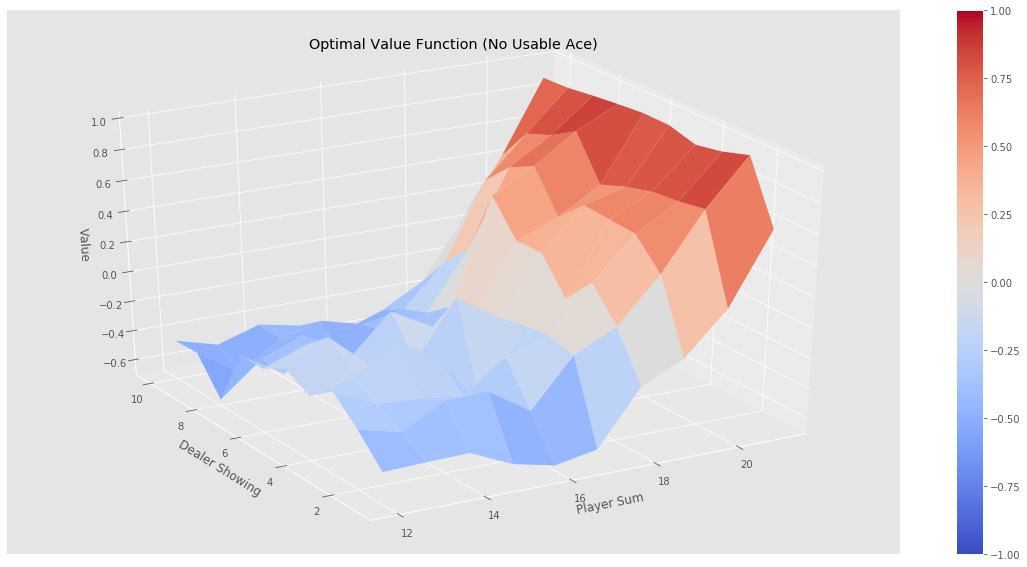

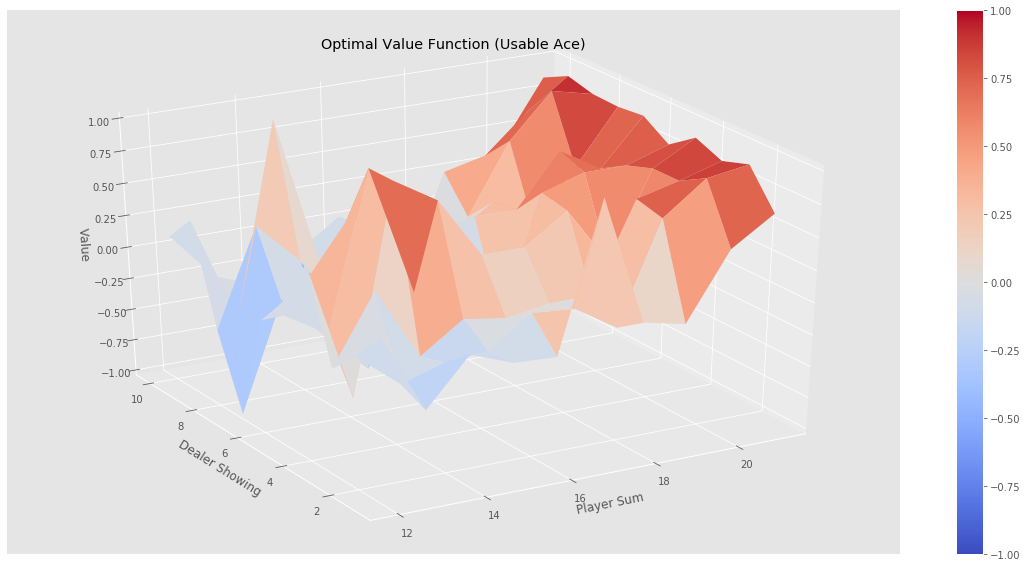

Episode 50000/500000.Epsilon: 0.0196078431372549
Mean: 0.19
Min: -1
Max: 1
Std: 0.9454628496138809
Mean with usable Ace: 0.5555555555555556
Min with usable Ace: -1
Max with usable Ace: 1
Std with usable Ace: 0.6849348892187752
Mean without usable Ace: 0.15384615384615385
Min without usable Ace: -1
Max without usable Ace: 1
Std without usable Ace: 0.9598886945899981


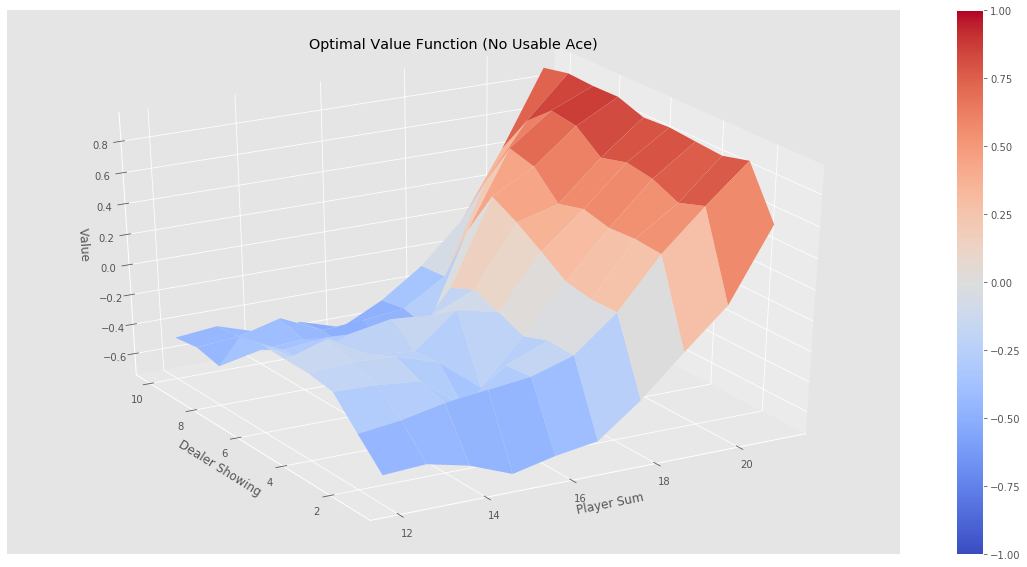

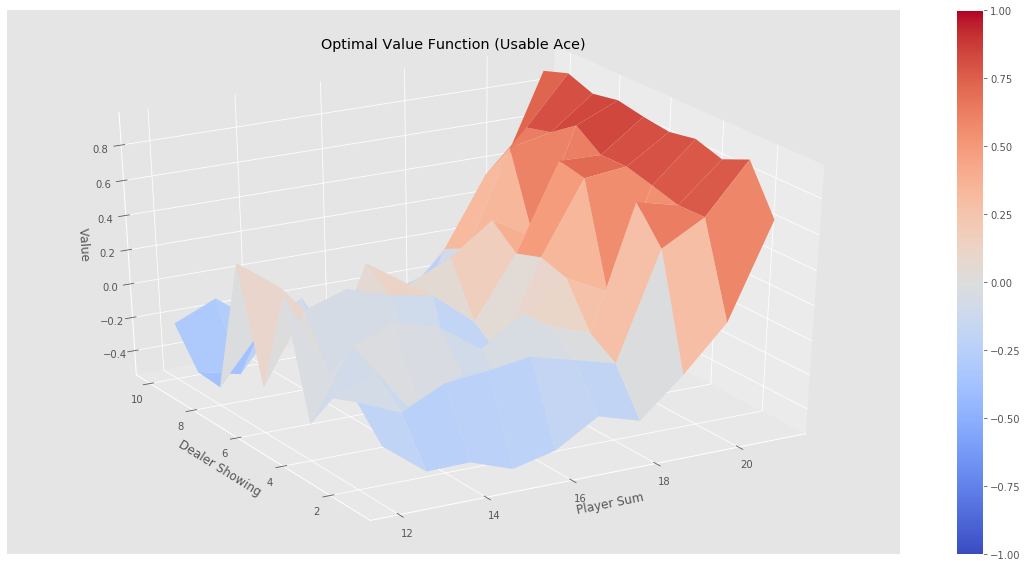

Episode 100000/500000.Epsilon: 0.009900990099009901
Mean: -0.15
Min: -1
Max: 1
Std: 0.931396800509858
Mean with usable Ace: 0.6666666666666666
Min with usable Ace: 0
Max with usable Ace: 1
Std with usable Ace: 0.4714045207910317
Mean without usable Ace: -0.20212765957446807
Min without usable Ace: -1
Max without usable Ace: 1
Std without usable Ace: 0.92919305226841


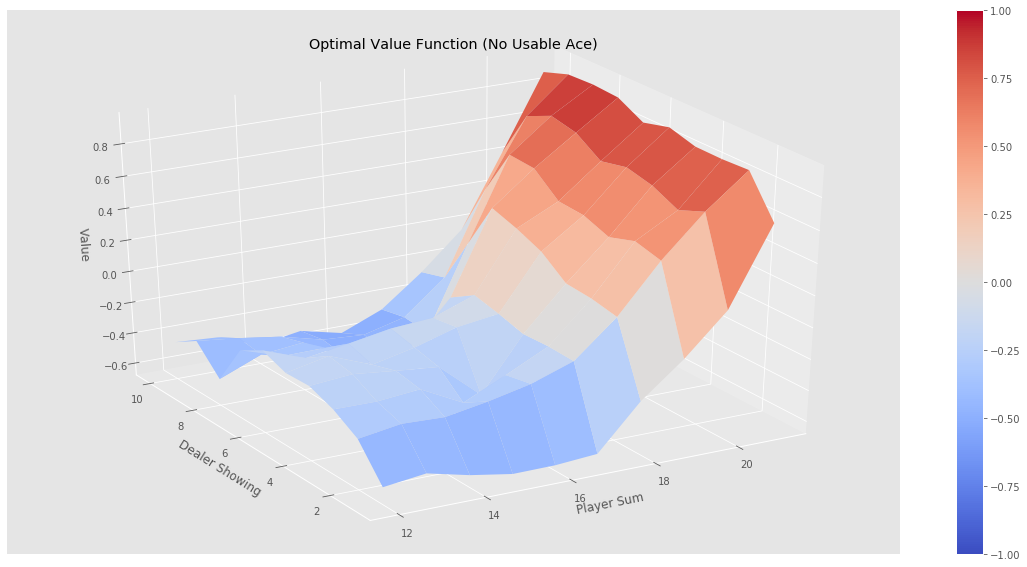

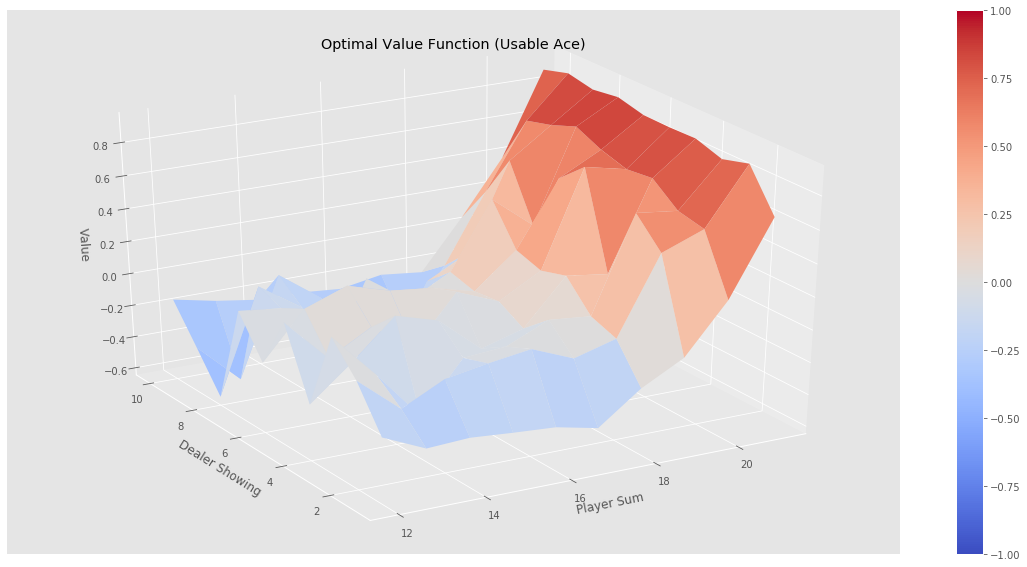

Episode 300000/500000.Epsilon: 0.0033222591362126247
Mean: -0.12
Min: -1
Max: 1
Std: 0.9410632284814874
Mean with usable Ace: 0.7142857142857143
Min with usable Ace: 0
Max with usable Ace: 1
Std with usable Ace: 0.4517539514526256
Mean without usable Ace: -0.1827956989247312
Min without usable Ace: -1
Max without usable Ace: 1
Std without usable Ace: 0.9383838378181261


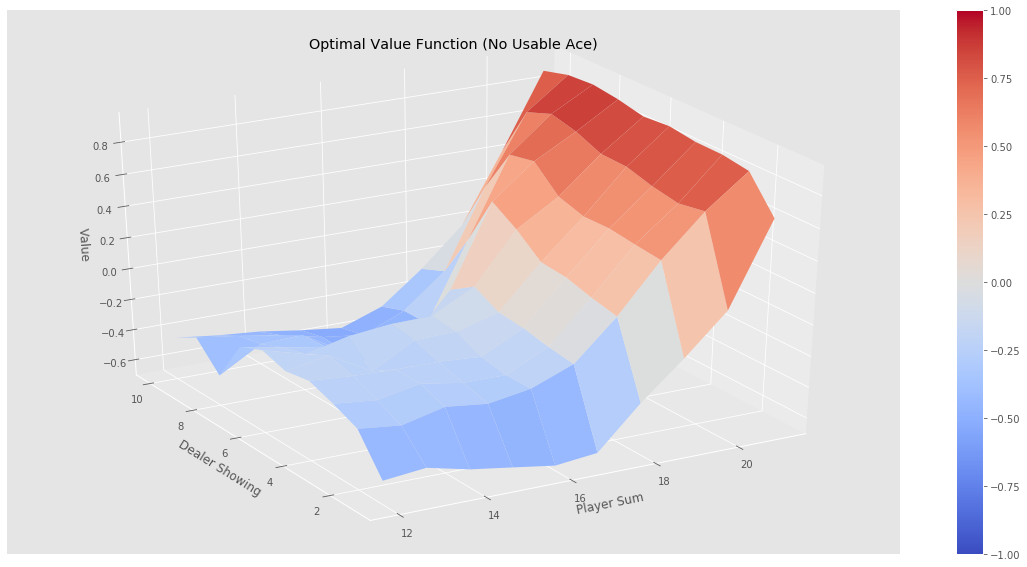

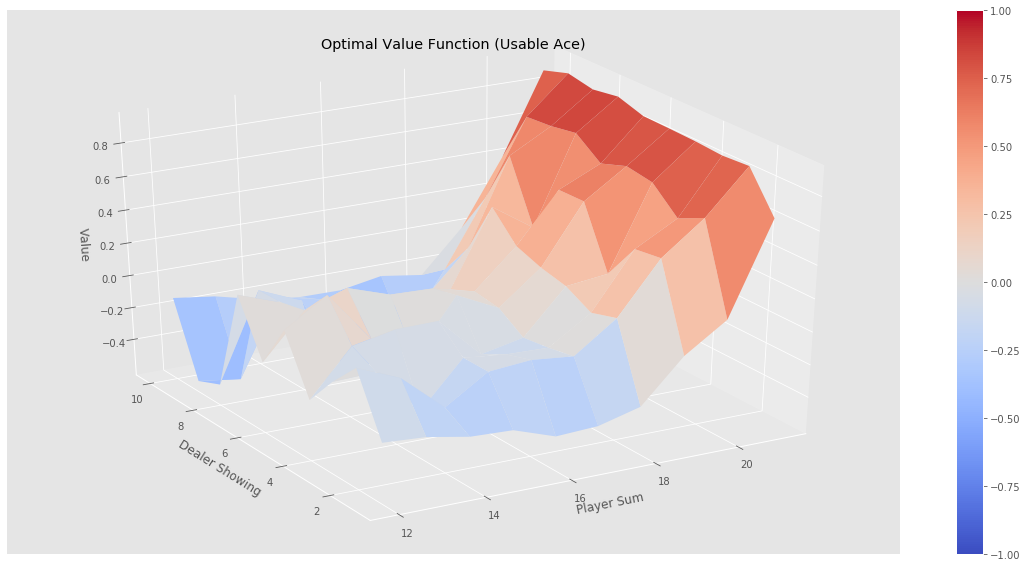

Episode 400000/500000.Epsilon: 0.0024937655860349127
Mean: -0.21
Min: -1
Max: 1
Std: 0.9305374790947435
Mean with usable Ace: 0.2857142857142857
Min with usable Ace: -1
Max with usable Ace: 1
Std with usable Ace: 0.8806305718527108
Mean without usable Ace: -0.29069767441860467
Min without usable Ace: -1
Max without usable Ace: 1
Std without usable Ace: 0.9132904867841369


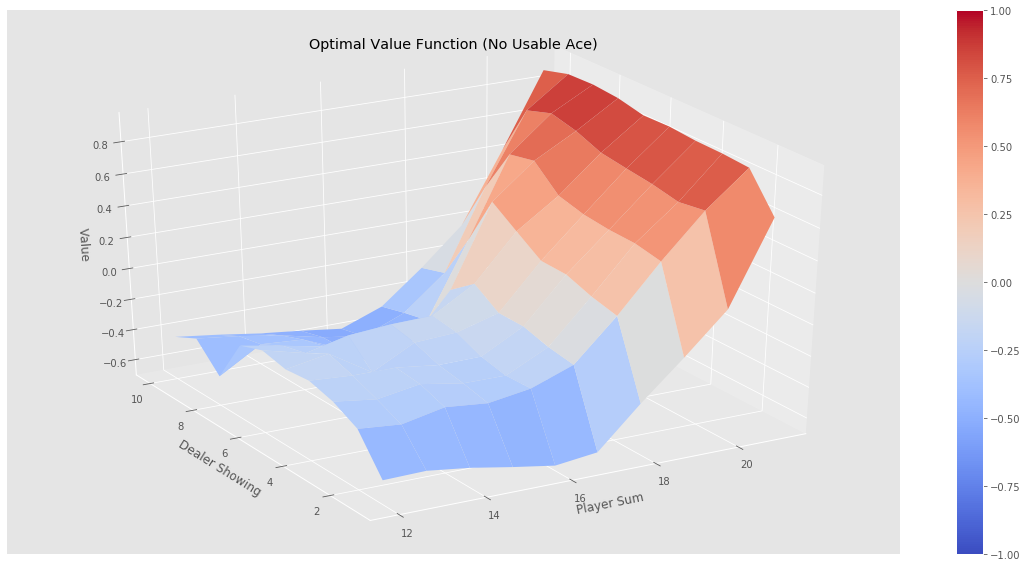

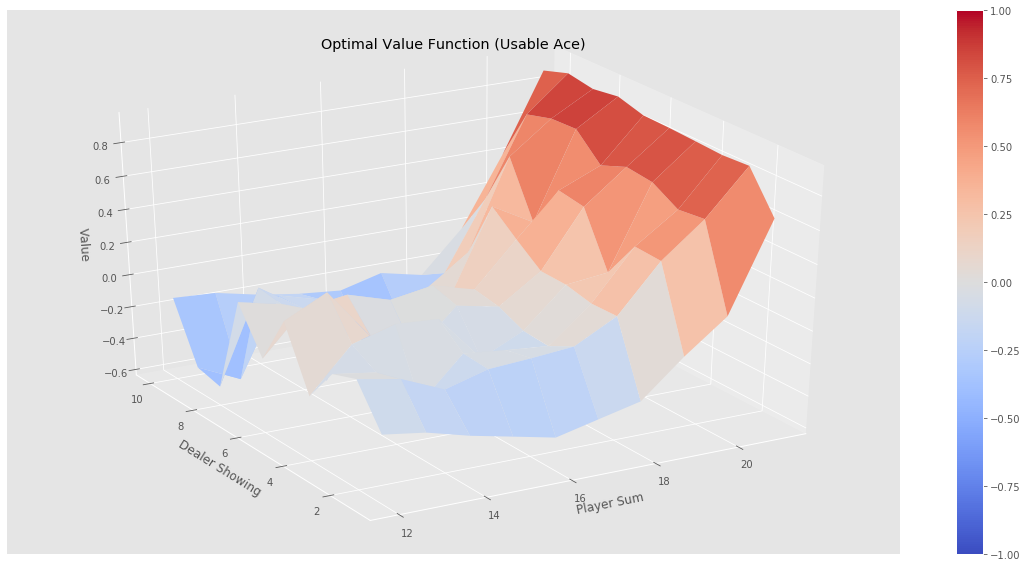


 64.25459070000034 s


C:\Users\lilln\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [59]:
start = time.clock()

Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

end = time.clock()
print("\n",end - start,"s")

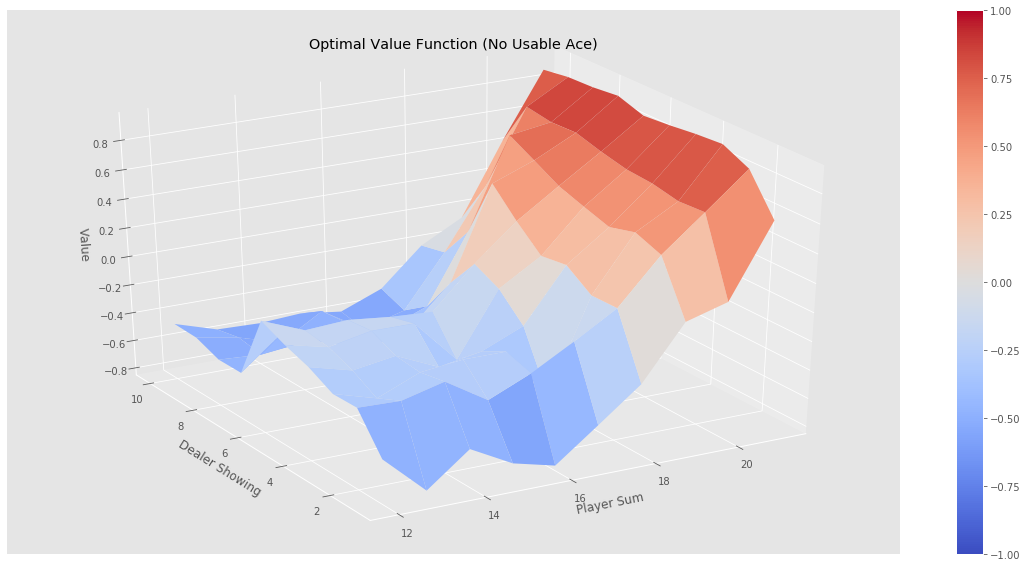

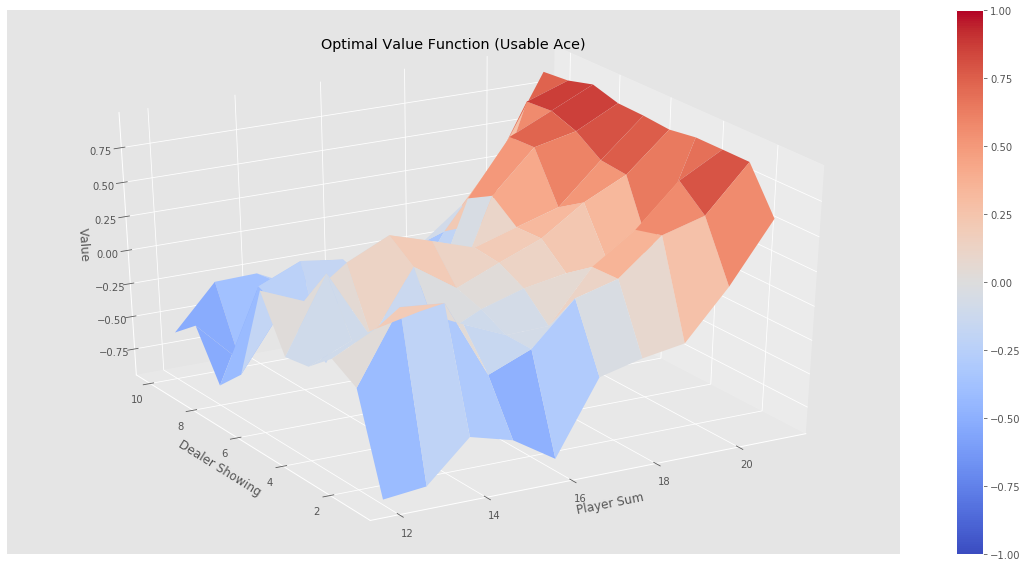

In [31]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")